#### The puprpose of this notebook is to compare modified EWG and modified SAIN LIM score for all food items (59K) 
#### Author: Reshma

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#### Read Files

In [61]:
dataPath2 = 'Courses/Capstone/Datasets/Nutrition/'
data      = pd.read_csv(dataPath2 + 'Nutrition Data Consolidated (James)_Sept_12_with_type_scores_price.csv')

In [62]:
data['Modified SAIN - LIM Score'] = data['SAIN_LIM_Point'].map(int)
data['Modified EWG Score']        = data['EWG_scale_macro_nutri_points'].map(int)
data['Department']                = data['department'].apply(lambda x : x.capitalize())
data['Aisle']                     = data['aisle'].apply(lambda x : x.capitalize())

In [63]:
data.drop(['SAIN_LIM_Point','EWG_scale_macro_nutri_points', 'department','aisle'], axis=1, inplace=True)

#### Modified SAIN LIM distribution across department

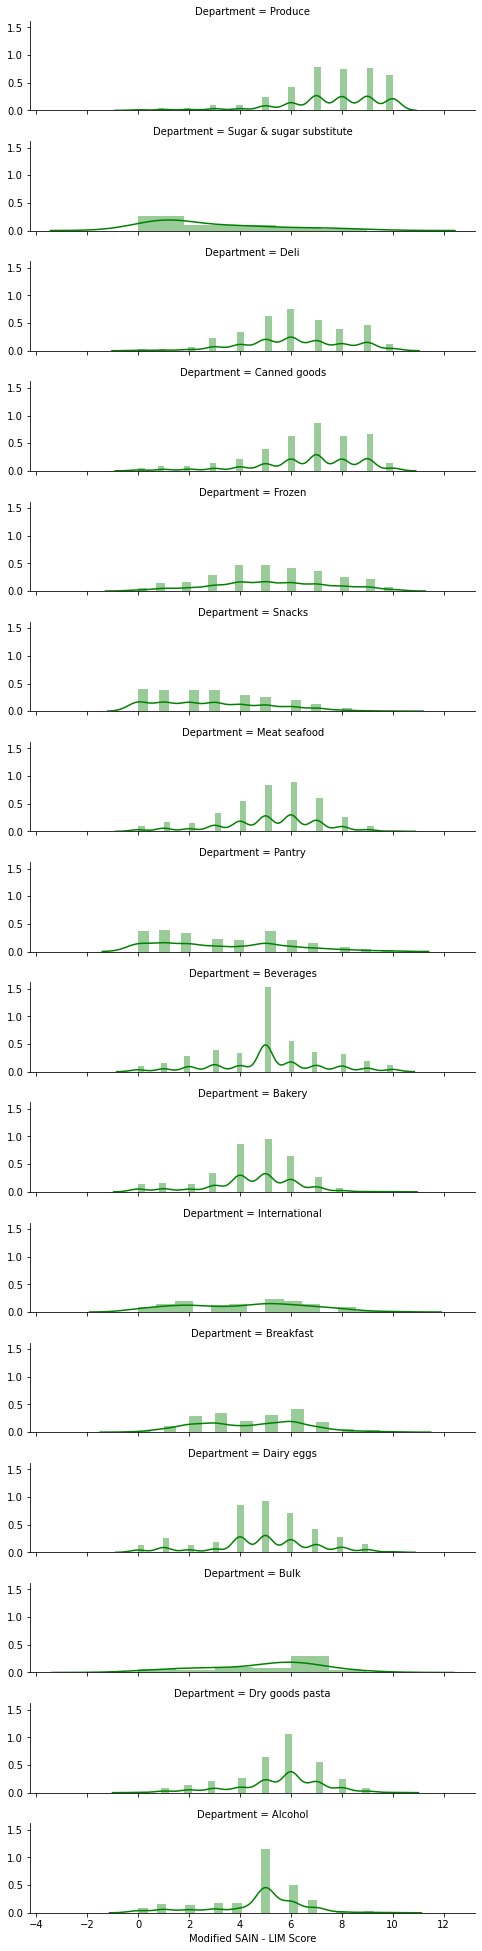

In [64]:
depts = data['Department'].unique()
g = sns.FacetGrid(data, row="Department", row_order=depts,
                  height=1.7, aspect=4)
g.map(sns.distplot, 'Modified SAIN - LIM Score', color='green')

#### Modified EWG distribution across department

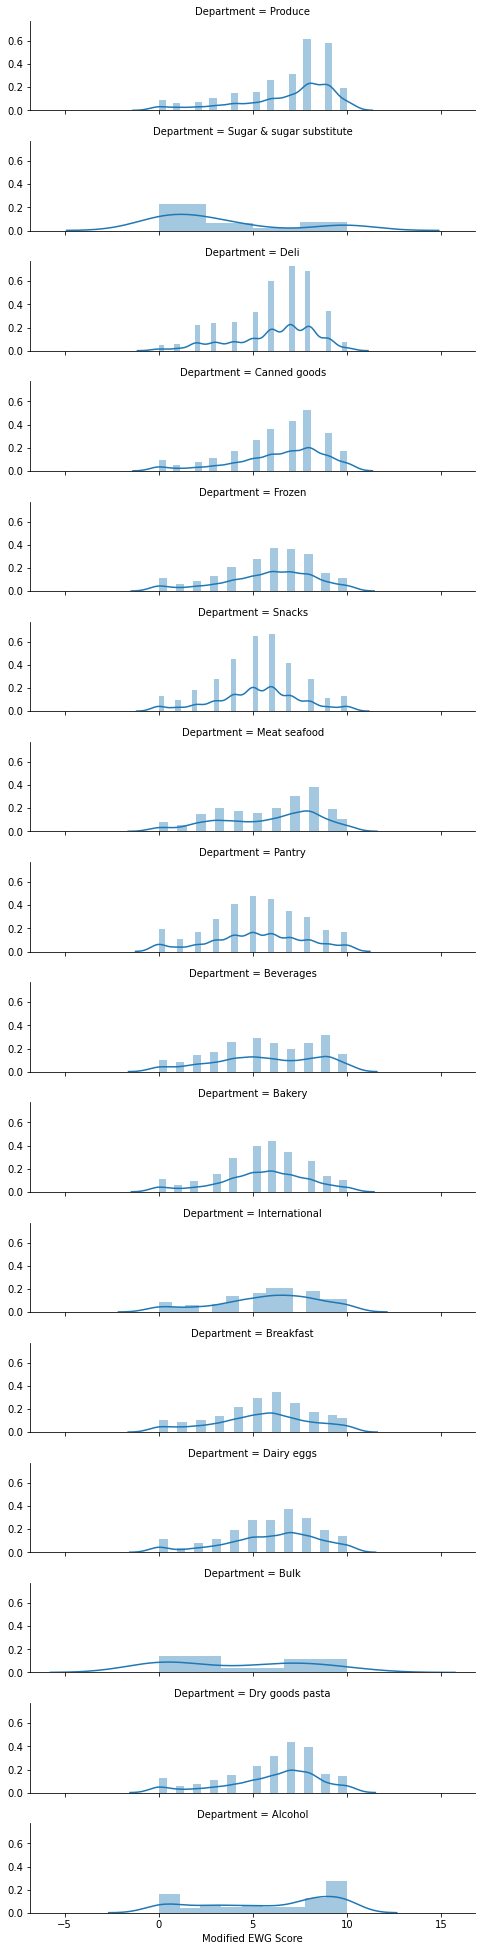

In [65]:
depts = data['Department'].unique()
g = sns.FacetGrid(data, row="Department", row_order=depts,
                  height=1.7, aspect=4)
g.map(sns.distplot, 'Modified EWG Score')

#### Scatter plot of Modified SAIN-LIM vs Modified EWG 

In [87]:
scatter          = data.groupby(["Modified EWG Score", "Modified SAIN - LIM Score"]).size().reset_index()
scatter.column   = ["Modified EWG Score", "Modified SAIN - LIM Score", "Counts"]

In [88]:
def get_group(ewg, sain):
    if sain == ewg:
        return 'Identical'
    elif sain in range(ewg-1, ewg+2):
        return 'Similar'
    elif ewg in range(sain-1, sain+2):
        return 'Similar'
    elif ewg in range(sain-2, sain+4):
        return 'Variant'
    elif sain in range(ewg-2, ewg+4):
        return 'Variant'
    else:
        return 'Dissimilar'

scatter['Group']  = scatter[["Modified EWG Score", "Modified SAIN - LIM Score"]].apply(lambda x : get_group(x.values[0], x.values[1]), axis=1)

In [90]:
scatter['Modified EWG Score']        = scatter['Modified EWG Score'].map(str)
scatter['Modified SAIN - LIM Score'] = scatter['Modified SAIN - LIM Score'].map(str)

In [ ]:
'seagreen' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

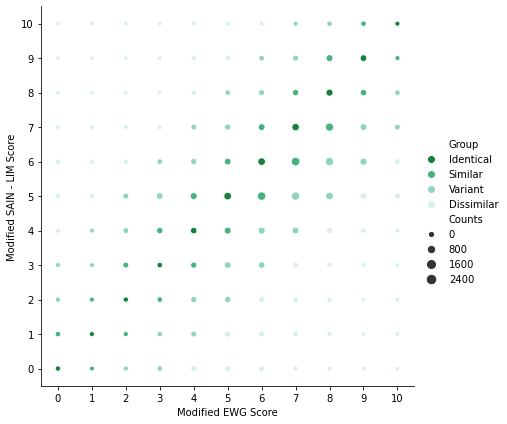

In [105]:
sns.relplot(x="Modified EWG Score", y="Modified SAIN - LIM Score", size="Counts",hue='Group', data = scatter, height=6, palette='BuGn_r')

#### Department wise distribution between Modified SAIN-LIM vs Modified EWG 

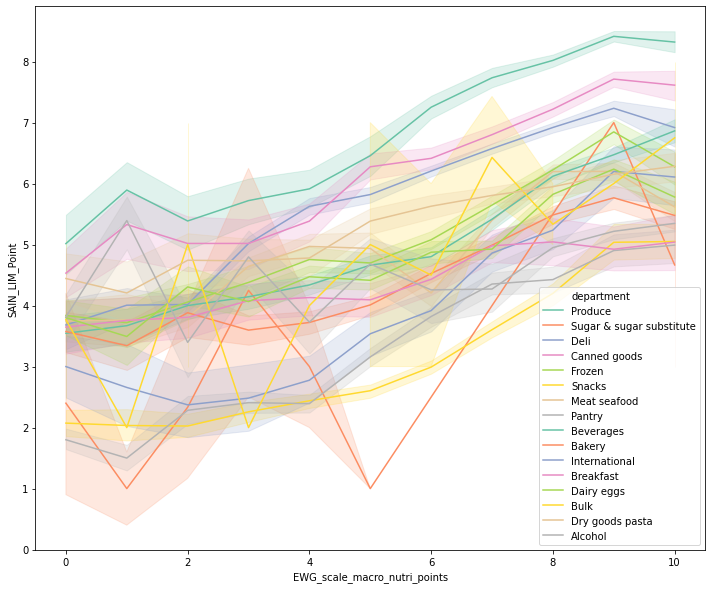

In [56]:
plt.figure(figsize=(12,10))
sns.lineplot(x="Modified EWG Score", y="Modified SAIN - LIM Score",hue="department", data=data, palette = 'Set2')

#### Box plot between Modified SAIN-LIM vs Modified EWG 

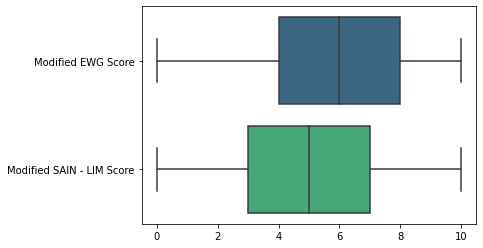

In [106]:
ax = sns.boxplot(data=data[["Modified EWG Score", "Modified SAIN - LIM Score"]], orient="h", palette="viridis")

#### Department wise distribution of Modified SAIN-LIM vs Modified EWG 

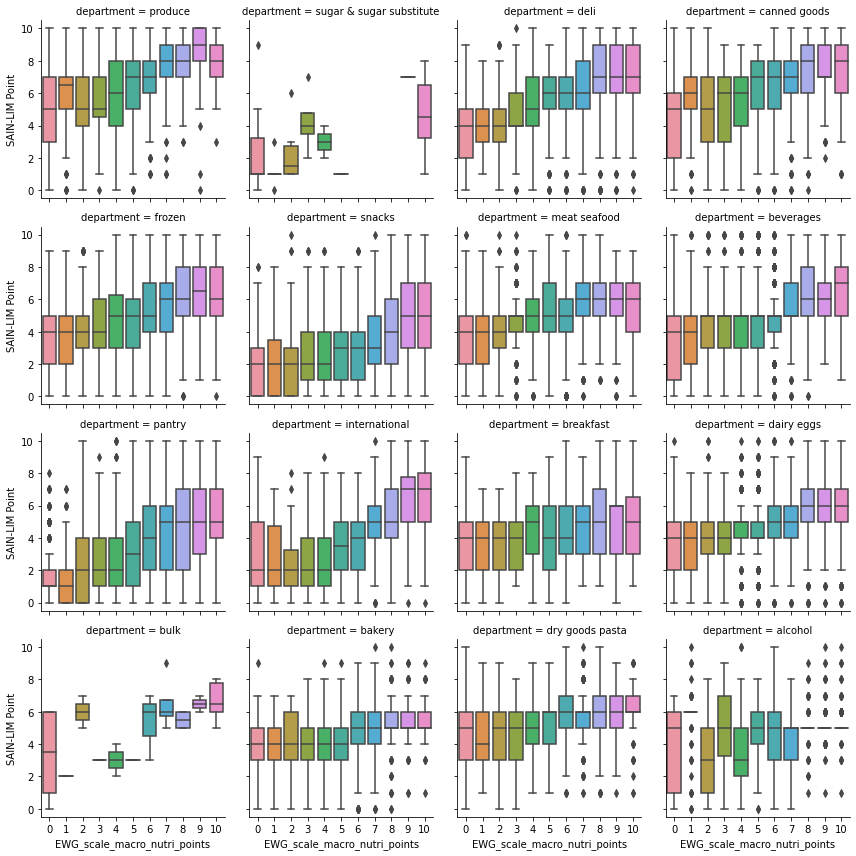

In [11]:
g = sns.catplot(x="Modified EWG Score", y="Modified SAIN - LIM Score", col="Department",
                data=scores, kind="box", col_wrap=4, 
                height=3);

#### Aisle wise distribution between Modified SAIN-LIM vs Modified EWG 

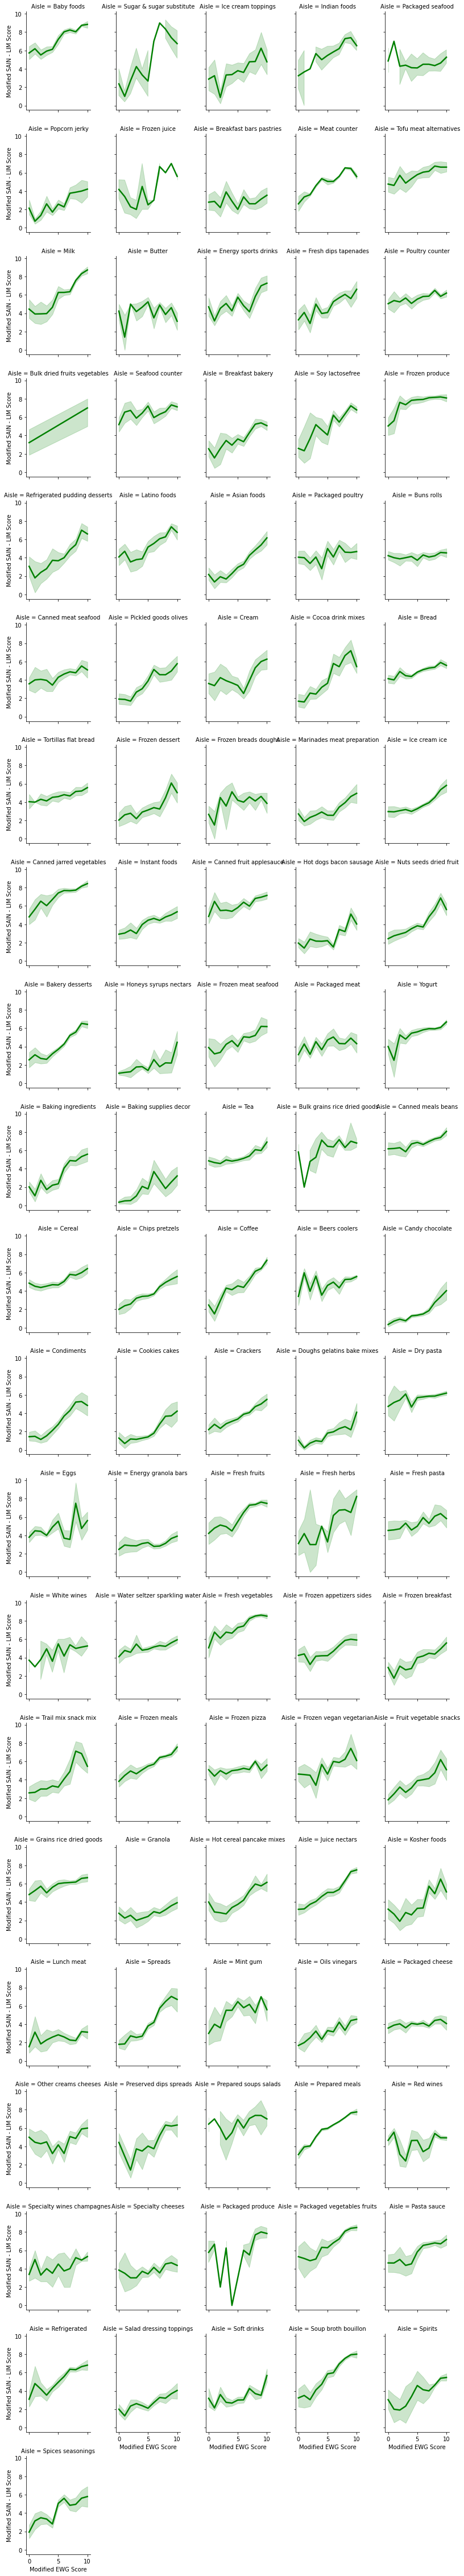

In [113]:
sns.relplot(x="Modified EWG Score", y="Modified SAIN - LIM Score", 
            col="Aisle", col_wrap=5, color='green',
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=data)

In [118]:
linear_aisle =['Prepared meals', 'Juice nectars', 'Bulk dried fruits vegetables', 'Bakery desserts', 'Tofu meat alternatives']
linear_data = data[data['Aisle'].isin(linear_aisle)]

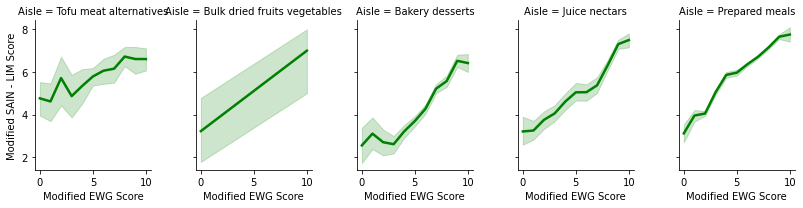

In [119]:
sns.relplot(x="Modified EWG Score", y="Modified SAIN - LIM Score", 
            col="Aisle", col_wrap=5, color='green',
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=linear_data)

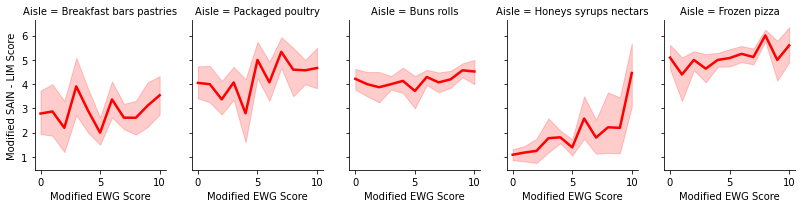

In [121]:
nonlinear_aisle =['Packaged poultry','Breakfast bars pastries', 'Buns rolls', 'Honeys syrups nectars', 'Frozen pizza']
nonlinear_data = data[data['Aisle'].isin(nonlinear_aisle)]
sns.relplot(x="Modified EWG Score", y="Modified SAIN - LIM Score", 
            col="Aisle", col_wrap=5, color='red',
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=nonlinear_data)

#### Correlation measure between Modified SAIN-LIM vs Modified EWG 

In [14]:
import scipy.stats

In [15]:
x=scores["Modified EWG Score"]
y=scores["Modified SAIN - LIM Score"]

In [26]:
scipy.stats.pearsonr(x, y)[0]

0.3331735826101059

In [27]:
scipy.stats.spearmanr(x, y)[0]

0.34446091277727403

In [28]:
scipy.stats.kendalltau(x, y)[0]

0.2641730000808781

In [29]:
corr_df   = pd.DataFrame(columns = ['aisle', 'pearson corr', 'spearman corr', 'kendallTau corr'])
corr_dict = {'aisle':np.nan, 'pearson corr':np.nan, 'spearman corr':np.nan, 'kendallTau corr': np.nan}

In [30]:
for aisle in scores.aisle.unique():
    df = scores[scores['aisle']==aisle]
    x  = df["EWG_scale_macro_nutri_points"].values
    y  = df["SAIN-LIM Point"].values
    corr_arr              = [aisle, scipy.stats.pearsonr(x, y)[0], scipy.stats.spearmanr(x, y)[0], scipy.stats.kendalltau(x, y)[0]]
    corr_aisle_df         = pd.DataFrame(corr_arr).T
    corr_aisle_df.columns = ['aisle', 'pearson corr', 'spearman corr', 'kendallTau corr']
    corr_df = pd.concat([corr_df, corr_aisle_df])

In [31]:
corr_df.to_csv(dataPath+'corr_EWG_SAINLIM_per_aisle.csv', index=False)

In [32]:
scores[["EWG_scale_macro_nutri_points","SAIN-LIM Point"]].to_csv('EWG_SAINLIM_corr.csv', index=False)

#### Individual level difference between modified EWG score  and modified SAIN-LIM score

In [33]:
def plot_barplot(df, name, col_name, x_name):
    df = df[df['EWG_scale_macro_nutri_points'] == name]
    score_count = df[col_name].value_counts()
    plt.figure(figsize=(10,5))
    sns.barplot(score_count.index, score_count.values, alpha=0.8)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(x_name, fontsize=12)
    plt.xticks(rotation='vertical')
    plt.title('EWG score = ' + str(name))
    plt.show()

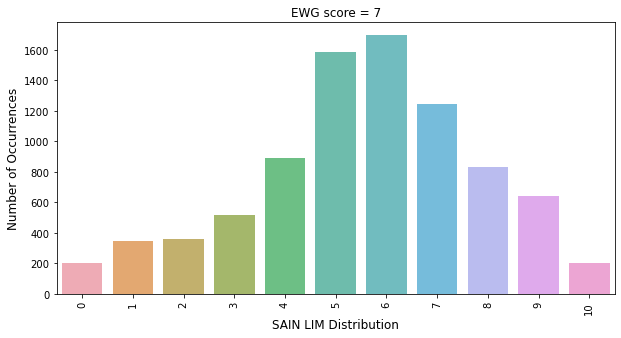

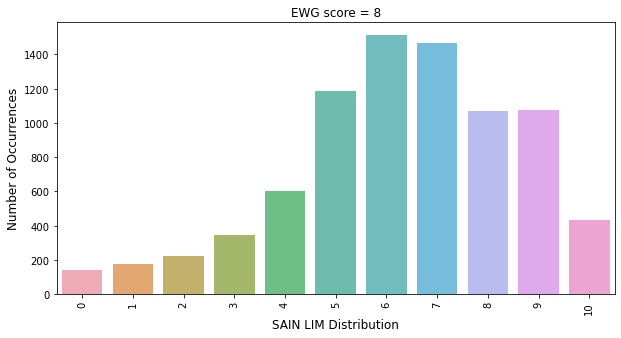

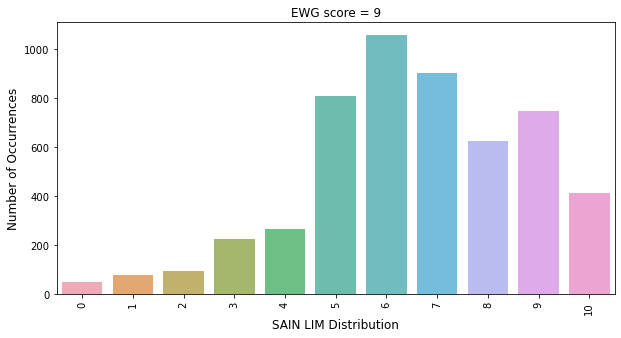

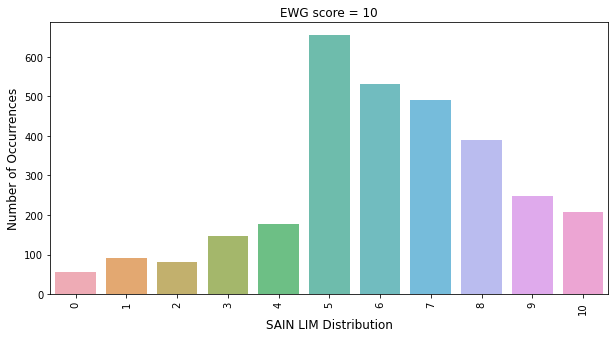

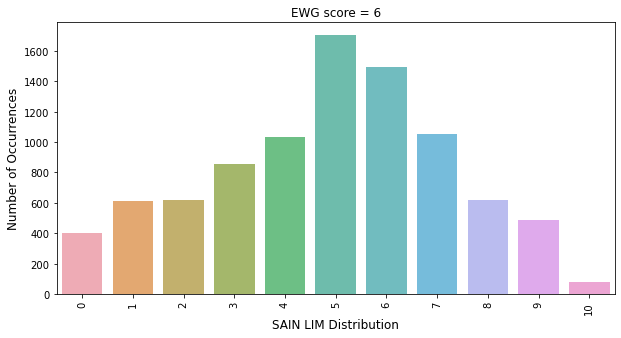

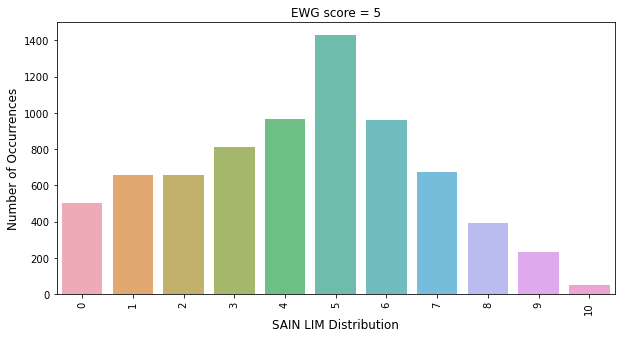

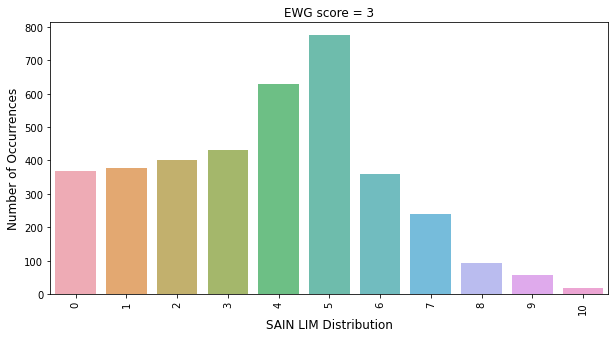

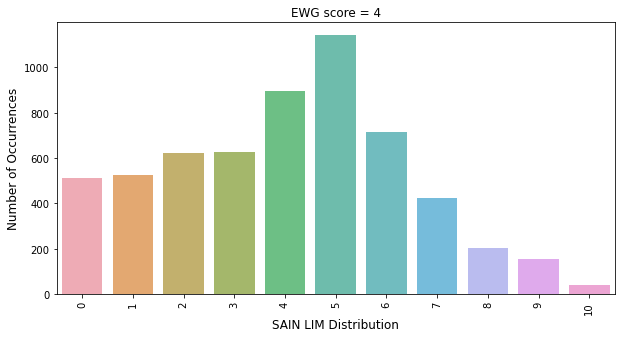

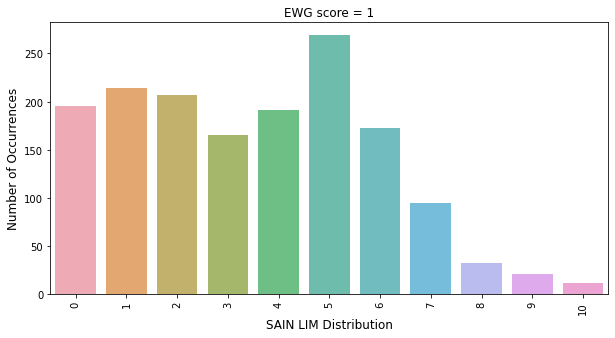

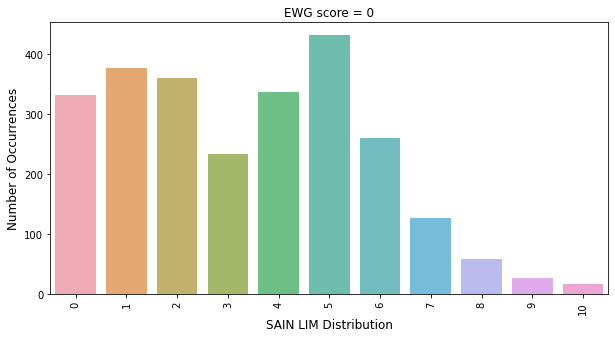

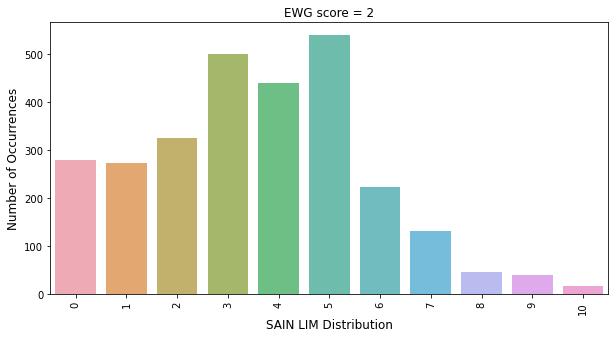

In [34]:
for ewg_score in scores['EWG_scale_macro_nutri_points'].unique():
    plot_barplot(scores, ewg_score, 'SAIN-LIM Point', 'SAIN LIM Distribution')